## Introduction
In today's session, we will 

In [72]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas_datareader as web_reader
import matplotx
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from scipy.stats import norm
import math
import seaborn as sns

tickers = ['SPY']

start_date = '2010-09-14'
end_date = '2022-09-14'
tickers = ['SPY', 'AGG']

df = web_reader.DataReader(tickers, 'yahoo', start=start_date, end=end_date)
data = df.Close.SPY.resample("B").last().fillna(method="bfill")
data_agg = df.Close.AGG.resample("B").last().fillna(method="bfill")

## Plot Historical Close Price

AttributeError: module 'matplotx' has no attribute 'xlabels'

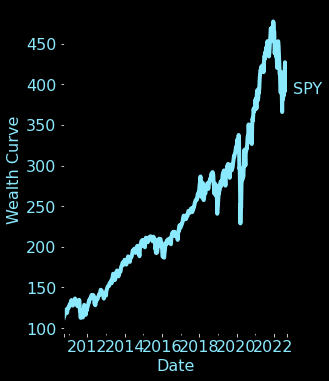

In [75]:
plt.style.use("./stylesheets/dracula_slide.mplstyle")
data.resample("W").last().plot(figsize=(4,6));
plt.ylabel("Wealth Curve")  
matplotx.line_labels() 
matplotx.xlabels() 

plt.savefig("output/wealth_curve_spy.png" );

## Plot Historical Returns

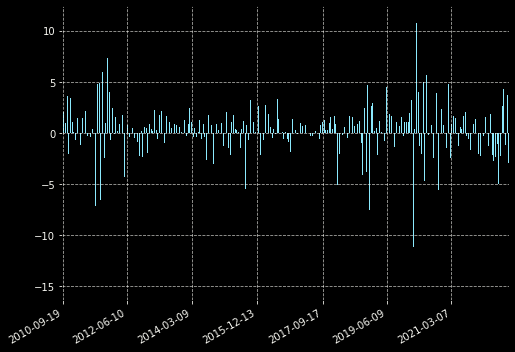

In [45]:
plt.figure(figsize=(8, 6))
data_bar = data.resample("W").last().pct_change().multiply(100)
index = data_bar.index
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]
data_bar.index = index
ax = data_bar.plot.bar()
plt.ylabel("Weekly Return (%)")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()
plt.savefig("output/weekly_returns_spy.png" );

## Sorted Weekly Returns

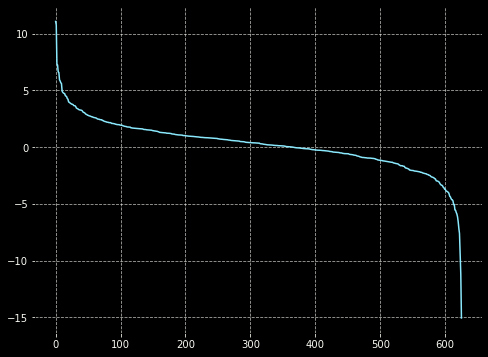

In [46]:
sorted_returns.plot(figsize=(8, 6));
plt.savefig("output/sorted_weekly_returns_spy.png" );

## Return Distribution

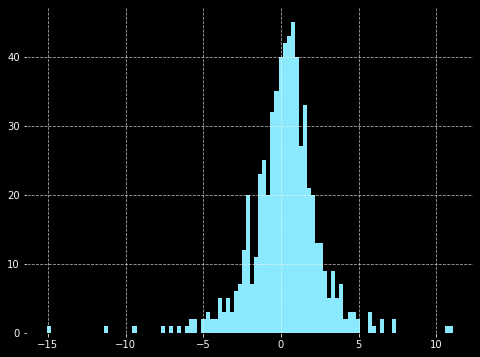

In [47]:
data_bar.hist(bins=100, figsize=(8,6));

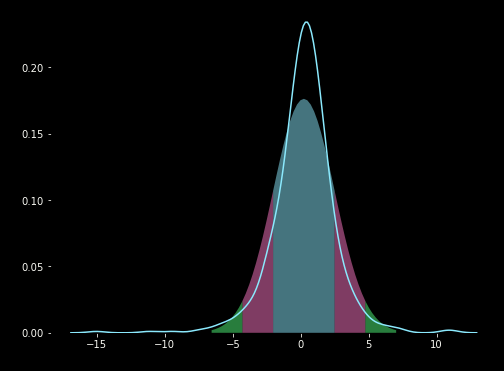

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(data_bar)
mean = data_bar.mean()
std = data_bar.std()
N = 10
for i in [1, 2, 3]:
    x1 = np.linspace(mean - i*std, mean - (i - 1)*std, N)
    x2 = np.linspace(mean - (i - 1)*std, mean + (i - 1)*std, N)
    x3 = np.linspace(mean + (i - 1)*std, mean + i*std, N)
    x = np.concatenate((x1, x2, x3))
    x = np.where((mean - (i - 1)*std < x) & (x < mean + (i - 1)*std), np.nan, x)
    y = norm.pdf(x, mean, std)
    ax.fill_between(x, y, alpha=0.5)

plt.xlabel("SPY Weekly Returns (in %, US Dollar)")
plt.ylabel("Probability Density Function")
#plt.xticks(ticks=range(0, 10))
plt.grid()

plt.show()

## Historical Volatility 

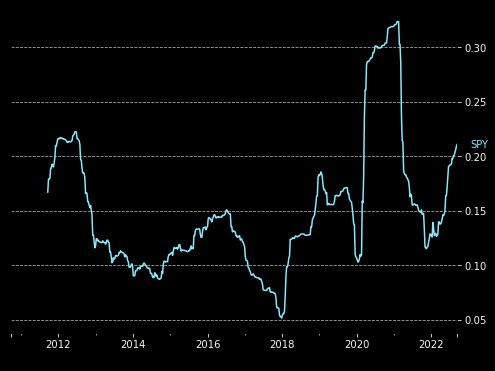

In [49]:
plt.figure(figsize=(8, 6))
plt.savefig("output/wealth_curve_spy.png" );
data.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=True)
matplotx.line_labels() 
plt.savefig("output/wealth_curve_spy_with_vol.png" );

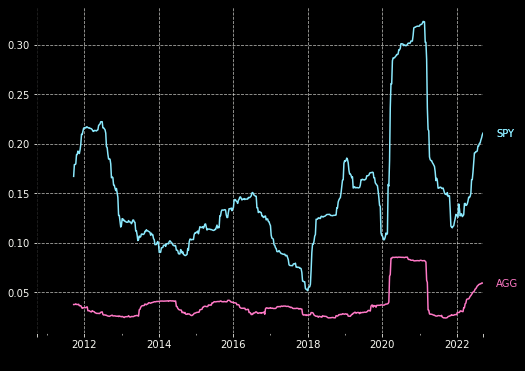

In [50]:
plt.figure(figsize=(8, 6))
data.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=False)
matplotx.line_labels()
plt.savefig("output/vol_spy.png" );
data_agg.resample("W").last().pct_change().rolling(52).std().multiply(math.sqrt(52)).plot(secondary_y=False)
matplotx.line_labels()
plt.savefig("output/vol_spy_with_agg.png" );
